## Introduction
**Goal**: Predict a car's market price using its attributes. For each car, we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, and more. Here are some [more information](https://archive.ics.uci.edu/ml/datasets/automobile) about the dataset

Links to download the dataset: [here](https://archive.ics.uci.edu/ml/datasets/automobile)

## Dataset dictionary
. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
columns_name = ['symboling', 'normalize_losses', 'make', 'fuel-type', 'aspiration',
               'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base',
               'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_of_cyclinders',
               'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
               'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
# When we read the dataset, we didn't get the columns' name as expected, so we have to re-create the names ourselves
cars= pd.read_csv('imports-85.data', names = columns_name)
cars.head()

,symboling,normalize_losses,make,fuel-type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalize_losses     205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cyclinders    205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [4]:
numeric_columns = cars.select_dtypes(include = 'number')
# Print out the name of the columns
print(numeric_columns.columns.tolist)

<bound method Index.tolist of Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg'],
      dtype='object')>


After inspecting the first 5 rows:
- The `price` column will be the target column
- Features columns: `symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'city_mpg', 'highway_mpg`

## Data Cleaning

Normally, if we want to use a dataset for predictive modeling, we can't have any missing values.

Based on the preview of the dataset, we can see that `normalized_losses` column contain missing value `?`

Therefore, we will replace these values and find other missing value in the rest of the columns as well as **rescale** so that the values all range from 0 - 1

In [5]:
## Replacing `?` values in `normalized_losses` column
cars['normalize_losses'] = cars['normalize_losses'].replace('?', np.nan)
print(cars['normalize_losses'].head())

0    NaN
1    NaN
2    NaN
3    164
4    164
Name: normalize_losses, dtype: object


In [6]:
## Replace missing values `NaN` into numeric so that we can convert it into int type
print(cars['normalize_losses'].isnull().sum())
print(len(cars['normalize_losses']))

41
205


The ratio of missing values comparing with the entire column is 20%. Hence, instead of dropping the whole column, we will replace those missing values with the average values in that column

In [7]:
# Convert the `normalized_loss` column into numeric type
cars['normalize_losses']= cars['normalize_losses'].astype('float')
mean_loss = cars['normalize_losses'].mean()
print(mean_loss)

122.0


In [8]:
# Replace all `NaN` values with the mean of the column
cars['normalize_losses'].fillna(mean_loss, inplace = True)
print(cars['normalize_losses'].head())

0    122.0
1    122.0
2    122.0
3    164.0
4    164.0
Name: normalize_losses, dtype: float64


In [9]:
## Explore missing values in other columns
print(cars.isnull().sum())

symboling            0
normalize_losses     0
make                 0
fuel-type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cyclinders    0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


As above, all of the columns have 0 missing values

In [10]:
print(cars.select_dtypes(include = 'object').head())

          make fuel-type aspiration num_of_doors   body_style drive_wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine_location engine_type num_of_cyclinders fuel_system  bore stroke  \
0           front        dohc              four        mpfi  3.47   2.68   
1           front        dohc              four        mpfi  3.47   2.68   
2           front        ohcv               six        mpfi  2.68   3.47   
3           front         ohc              four        mpfi  3.19   3.40   
4           front         ohc              five        mpfi  3.19   3.40   

  horsepower peak_rpm  price  
0        111     5000  13495  
1        111

Because `?` is a string value, we will replace it into `np.nan`, convert the column to numeric type, then fill in the missing values with mean of the column

In [11]:
## Build a pipeline to replace values with nan
def replace_values(df, columns, val):
    df[columns] = df[columns].replace(val, np.nan)
    # Convert to `float` type
    df[columns] = df[columns].astype('float')
    # Calculate the mean of that collumn
    mean = df[columns].mean()
    # Replace all NaN values with mean
    df[columns].fillna(mean, inplace = True)
    return df[columns]

In [12]:
cars['peak_rpm'] = replace_values(cars, 'peak_rpm', '?')
cars['stroke'] = replace_values(cars, 'stroke', '?')
cars['horsepower'] = replace_values(cars, 'horsepower', '?')
non_numeric_columns = ['horsepower', 'price', 'bore','stroke']
for val in non_numeric_columns:
    cars[val] = replace_values(cars, val, '?')
print(cars['peak_rpm'].value_counts())

5500.000000    37
4800.000000    36
5000.000000    27
5200.000000    23
5400.000000    13
6000.000000     9
4500.000000     7
5800.000000     7
5250.000000     7
4200.000000     5
4150.000000     5
4350.000000     4
4750.000000     4
4400.000000     3
5900.000000     3
5100.000000     3
4250.000000     3
6600.000000     2
5125.369458     2
5750.000000     1
4650.000000     1
5300.000000     1
5600.000000     1
4900.000000     1
Name: peak_rpm, dtype: int64


Besides, we can other string columns into numeric types, specifically `horsepower, peak_rpm, price, bore, stroke`

In [13]:
print(cars.select_dtypes(include = 'object').head())

          make fuel-type aspiration num_of_doors   body_style drive_wheels  \
0  alfa-romero       gas        std          two  convertible          rwd   
1  alfa-romero       gas        std          two  convertible          rwd   
2  alfa-romero       gas        std          two    hatchback          rwd   
3         audi       gas        std         four        sedan          fwd   
4         audi       gas        std         four        sedan          4wd   

  engine_location engine_type num_of_cyclinders fuel_system  
0           front        dohc              four        mpfi  
1           front        dohc              four        mpfi  
2           front        ohcv               six        mpfi  
3           front         ohc              four        mpfi  
4           front         ohc              five        mpfi  


In [14]:
# We can replace the string values in the `num_of_cyclinders` columns with appropriate numbers
cars['num_of_cyclinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_of_cyclinders, dtype: int64

In [15]:
cyclinder_num = {'four': 4,
                 'six': 6,
                 'five': 5,
                 'eight': 8, 
                 'two': 2,
                 'three': 3,
                 'twelve': 12}
cars['num_of_cyclinders'].replace(cyclinder_num, inplace= True)

In [16]:
print(cars['num_of_cyclinders'].value_counts())

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_of_cyclinders, dtype: int64


In [17]:
door_num = {'four': 4, 
             'two': 2,}
cars['num_of_doors'].replace(door_num, inplace= True)
print(cars['num_of_doors'].value_counts())

4    114
2     89
?      2
Name: num_of_doors, dtype: int64


In [18]:
# Because there're only 2 values with `?`, we can drop them without affecting the dataframe
cars['num_of_doors'] = replace_values(cars, 'num_of_doors', '?')
print(cars['num_of_doors'].value_counts())
print(cars['fuel-type'].value_counts())

4.000000    114
2.000000     89
3.123153      2
Name: num_of_doors, dtype: int64
gas       185
diesel     20
Name: fuel-type, dtype: int64


#### After several tries, I decided not to include these features when tuning hyperparameters model below

In [19]:
name = cars.select_dtypes(include = 'number').columns
name = name.drop(['price'])
col_to_normalized = cars[['symboling', 'normalize_losses', 'num_of_doors', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'num_of_cyclinders', 'engine_size',
       'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
       'city_mpg', 'highway_mpg']]
print(col_to_normalized)

     symboling  normalize_losses  num_of_doors  wheel_base  length  width  \
0            3             122.0      2.000000        88.6   168.8   64.1   
1            3             122.0      2.000000        88.6   168.8   64.1   
2            1             122.0      2.000000        94.5   171.2   65.5   
3            2             164.0      4.000000        99.8   176.6   66.2   
4            2             164.0      4.000000        99.4   176.6   66.4   
5            2             122.0      2.000000        99.8   177.3   66.3   
6            1             158.0      4.000000       105.8   192.7   71.4   
7            1             122.0      4.000000       105.8   192.7   71.4   
8            1             158.0      4.000000       105.8   192.7   71.4   
9            0             122.0      2.000000        99.5   178.2   67.9   
10           2             192.0      2.000000       101.2   176.8   64.8   
11           0             192.0      4.000000       101.2   176.8   64.8   

After some data cleaning, here is the list of the numeric columns we decided to keep: `symboling', 'normalize_losses', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'num_of_cyclinders', 'engine_size','bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm','city_mpg', 'highway_mpg', 'price`

In [20]:
## Normalize the numeric columns so all values range from 0 - 1
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(col_to_normalized)
scaled_df = pd.DataFrame(d, columns = name)
print(scaled_df)

     symboling  normalize_losses  num_of_doors  wheel_base    length  \
0          1.0          0.298429      0.000000    0.058309  0.413433   
1          1.0          0.298429      0.000000    0.058309  0.413433   
2          0.6          0.298429      0.000000    0.230321  0.449254   
3          0.8          0.518325      1.000000    0.384840  0.529851   
4          0.8          0.518325      1.000000    0.373178  0.529851   
5          0.8          0.298429      0.000000    0.384840  0.540299   
6          0.6          0.486911      1.000000    0.559767  0.770149   
7          0.6          0.298429      1.000000    0.559767  0.770149   
8          0.6          0.486911      1.000000    0.559767  0.770149   
9          0.4          0.298429      0.000000    0.376093  0.553731   
10         0.8          0.664921      0.000000    0.425656  0.532836   
11         0.4          0.664921      1.000000    0.425656  0.532836   
12         0.4          0.643979      0.000000    0.425656  0.53

In [21]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

scaled_df = clean_dataset(scaled_df)

In [22]:
## Append the scaled dataframe into the original
cars.drop(['symboling', 'normalize_losses', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'num_of_cyclinders', 'engine_size','bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm','city_mpg', 'highway_mpg'], axis =1, inplace = True)
cars_final = pd.concat([scaled_df, cars], axis=1)
print(cars_final.head())

   symboling  normalize_losses  num_of_doors  wheel_base    length     width  \
0        1.0          0.298429           0.0    0.058309  0.413433  0.316667   
1        1.0          0.298429           0.0    0.058309  0.413433  0.316667   
2        0.6          0.298429           0.0    0.230321  0.449254  0.433333   
3        0.8          0.518325           1.0    0.384840  0.529851  0.491667   
4        0.8          0.518325           1.0    0.373178  0.529851  0.508333   

     height  curb_weight  num_of_cyclinders  engine_size   ...     \
0  0.083333     0.411171                0.2     0.260377   ...      
1  0.083333     0.411171                0.2     0.260377   ...      
2  0.383333     0.517843                0.4     0.343396   ...      
3  0.541667     0.329325                0.2     0.181132   ...      
4  0.541667     0.518231                0.3     0.283019   ...      

   highway_mpg         make  fuel-type  aspiration   body_style  drive_wheels  \
0     0.289474  alfa-ro

In [23]:
# We'll take only numeric columns for training purpose
cars_numeric = cars_final.select_dtypes('number')
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 18 columns):
symboling            205 non-null float64
normalize_losses     205 non-null float64
num_of_doors         205 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
num_of_cyclinders    205 non-null float64
engine_size          205 non-null float64
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
horsepower           205 non-null float64
peak_rpm             205 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                205 non-null float64
dtypes: float64(18)
memory usage: 30.4 KB


## Univariate model

In [24]:
cars_numeric.drop(['symboling', 'num_of_doors', 'num_of_cyclinders'], axis = 1, inplace = True) 

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



We'll calculate Root mean squared error (RMSE) because its units are the base units (in our case, dollars) and thus, we can understand how far off in real dollars we can expect the model to perform

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt


# Create a function to train a column in the dataframe and return RMSE values
def knn_train_test(train_column, target_column, df):
    np.random.seed(1)   
    
    # Split the dataset into training & test set
    start = int(len(df) * 4/5)
    train = df.iloc[:start]
    test = df.iloc[start:]
     
    # Instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    # Fit model on training set & make predictions on test set
    knn.fit(train[train_column], train[target_column])
    predictions = knn.predict(test[train_column])
    
    # Calculate & return RMSE value
    mse_value = mean_squared_error(test[target_column], predictions)
    rmse_value = sqrt(mse_value)
    return rmse_value

# Test the each columns in the `cars_numeric` dataframe
for col in cars_numeric.columns:
    result = knn_train_test([col], ['price'], cars_numeric)
    print("{}: {}".format(col, result))

normalize_losses: 9150.523337235993
wheel_base: 6386.2552817657015
length: 6370.98241872678
width: 3292.5866683136655
height: 6310.731645185127
curb_weight: 2329.053429593436
engine_size: 4069.3213682487994
bore: 7546.031035665008
stroke: 7879.696574092692
compression_ratio: 6006.554331501684
horsepower: 4267.897997406411
peak_rpm: 7080.180701986601
city_mpg: 4067.933806929628
highway_mpg: 2941.558093871541
price: 116.93052415982154


In [26]:
# Create the same function accepting various n_neighbors
def knn_train_test(train_column, target_column, df):
    np.random.seed(1)   
    
    # Split the dataset into training & test set
    start = int(len(df) * 4/5)
    train = df.iloc[:start]
    test = df.iloc[start:]
     
    # Instantiate the KNeighborsRegressor class
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
    
    # Fit model on training set & make predictions on test set
        knn.fit(train[[train_column]], train[target_column])
        predictions = knn.predict(test[[train_column]])
    
    # Calculate & return RMSE value
        mse_value = mean_squared_error(test[target_column], predictions)
        rmse_value = sqrt(mse_value)
        
        k_rmses[k] = rmse_value 
    return k_rmses

# Test the each columns in the `cars_numeric` dataframe
result = {}
for col in cars_numeric.columns.drop('price'):
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    result[col] = rmse_val
    
result

{'bore': {1: 5941.301226860382,
  3: 6604.656586531677,
  5: 7546.031035665008,
  7: 7671.13458148803,
  9: 6625.105631921183},
 'city_mpg': {1: 5170.135503248558,
  3: 3787.247266335876,
  5: 4067.933806929628,
  7: 3740.7136715186844,
  9: 3708.8006241243897},
 'compression_ratio': {1: 7302.092147546894,
  3: 6257.795663987847,
  5: 6006.554331501684,
  7: 5626.368690797441,
  9: 5332.692518513045},
 'curb_weight': {1: 3966.8595562024652,
  3: 2383.891545903504,
  5: 2329.053429593436,
  7: 2597.9954486406787,
  9: 2576.228629051703},
 'engine_size': {1: 5583.719039947584,
  3: 5108.498388824048,
  5: 4069.3213682487994,
  7: 3502.5019460221606,
  9: 3375.5667270305653},
 'height': {1: 8290.18759102146,
  3: 8942.40939906587,
  5: 6310.731645185127,
  7: 5911.009874166346,
  9: 4592.665877524994},
 'highway_mpg': {1: 4479.683568964306,
  3: 2964.0764482027635,
  5: 2941.558093871541,
  7: 2710.668492426611,
  9: 2931.423479518287},
 'horsepower': {1: 5317.493307299101,
  3: 4711.2572

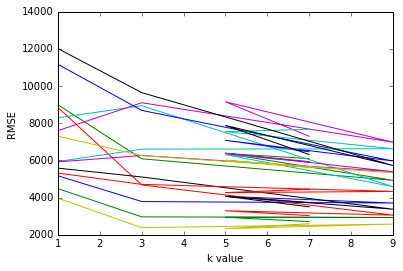

In [27]:
for k,v in result.items():
    x = list(v.keys())
    y = list(v.values()) 
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate model

In [28]:
# Compute average RMSE across different `k` values for each features:
feature_avg_rmse = {}

for k,v in result.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series = series_avg_rmse.sort_values()
print(sorted_series)

curb_weight          2770.805722
highway_mpg          3205.482017
city_mpg             4094.966174
engine_size          4327.921494
width                4580.675478
horsepower           4615.422655
wheel_base           5979.968415
compression_ratio    6105.100670
length               6494.447356
height               6809.400877
bore                 6877.645812
peak_rpm             7872.541669
normalize_losses     8026.126717
stroke               8314.198152
dtype: float64


In [29]:
sorted_series[:2].index

Index(['curb_weight', 'highway_mpg'], dtype='object')

In [30]:
## Modify the function above to accept multiple columns
def knn_train_test(train_column, target_column, df):
    np.random.seed(1)   
    
    # Split the dataset into training & test set
    start = int(len(df) * 4/5)
    train = df.iloc[:start]
    test = df.iloc[start:]
     
    # Instantiate the KNeighborsRegressor class
    knn = KNeighborsRegressor()
    
    # Fit model on training set & make predictions on test set
    knn.fit(train[train_column], train[target_column])
    predictions = knn.predict(test[train_column])
    
    # Calculate & return RMSE value
    mse_value = mean_squared_error(test[target_column], predictions)
    rmse_value = sqrt(mse_value)
    return rmse_value

top_features = {}
for i in range(2,7):
    result = knn_train_test(sorted_series[:i].index, 'price', cars_numeric)
    print('Best {} features: {}'.format(i, result))
    top_features['Best {} features'.format(i)] = result
    
top_features = pd.Series(top_features)
top_features = top_features.sort_values(ascending = True)

Best 2 features: 3367.154899975349
Best 3 features: 2370.97465204563
Best 4 features: 2385.379093051674
Best 5 features: 2422.325871538756
Best 6 features: 2188.237256054391


In [31]:
top_features

Best 6 features    2188.237256
Best 3 features    2370.974652
Best 4 features    2385.379093
Best 5 features    2422.325872
Best 2 features    3367.154900
dtype: float64

## Hyperparameter Tuning

Let's optimize the model that performed the best in the previous step.

For the top 3 models (3, 4 & 6 features) in the previous step, vary the hyperparameter value from 1 - 25 & plot the resulting RMSE values

In [32]:
def knn_train_test(train_column, target_column, df):
    np.random.seed(1)   
    
    # Split the dataset into training & test set
    start = int(len(df) * 4/5)
    train = df.iloc[:start]
    test = df.iloc[start:]
     
    # Instantiate the KNeighborsRegressor class
    k_values = [i for i in range(1,26)]
    k_rmses = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors= k)
    
    # Fit model on training set & make predictions on test set
        knn.fit(train[train_column], train[target_column])
        predictions = knn.predict(test[train_column])
    
    # Calculate & return RMSE value
        mse_value = mean_squared_error(test[target_column], predictions)
        rmse_value = sqrt(mse_value)
        
        k_rmses[k] = rmse_value 
    return k_rmses

k_hyper_values = {}
for i in range(2,7):
    result = knn_train_test(sorted_series[:i].index, 'price', cars_numeric)
    print('Best {} features: \n{}\n'.format(i, result))
    k_hyper_values['Best {} features'.format(i)] = result

Best 2 features: 
{1: 4319.327249389079, 2: 3446.4769971360165, 3: 3559.8735670110136, 4: 3179.3483380300013, 5: 3367.154899975349, 6: 3103.3122686501442, 7: 2896.904714235643, 8: 2715.887074217433, 9: 2605.7142495344956, 10: 2617.688734864642, 11: 2526.3634265880446, 12: 2560.5409930443334, 13: 2629.9193158523644, 14: 2636.0284045455282, 15: 2669.1797804257653, 16: 2582.356008974711, 17: 2526.4499426392554, 18: 2557.665420035287, 19: 2596.9898745789087, 20: 2612.9552968785924, 21: 2586.8471179527796, 22: 2594.3121260790263, 23: 2602.8630492171296, 24: 2455.110268181772, 25: 2425.4136431011057}

Best 3 features: 
{1: 4144.490324368062, 2: 3284.882251189409, 3: 2846.409918816607, 4: 2478.4666915466923, 5: 2370.97465204563, 6: 2498.6444278714794, 7: 2457.914307918735, 8: 2329.414964649994, 9: 2293.7713905311966, 10: 2547.394442140189, 11: 2582.6505782495906, 12: 2566.315470113162, 13: 2603.0624798807225, 14: 2618.267097502697, 15: 2554.333632567763, 16: 2454.986295540139, 17: 2439.413214

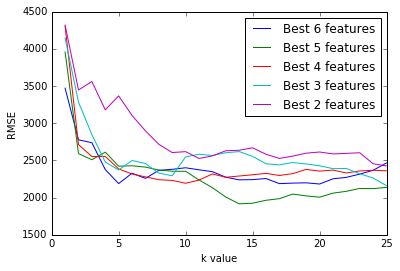

In [33]:
for k,v in k_hyper_values.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label="{}".format(k))
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()